***
***
***

<br><h1 style="font-size:300%;"> Regression Based Analysis</h1>
<b>DAT-5303 | Machine Learning</b>
<br>Andrew D'Armond - 5574864<br>
Hult International Business School<br><br><br>

***
***
***

<h2>Objective</h2><br>

Apprentice Chef is looking to extend its revenue stream with its Cross-Sell Platform of *Halfway There*

The objective is to create an algorithm with the highest prediction rate for the platform in
understanding its ability to sell for a wider audience
In order to complete the analysis of the Apprentice Chef data we need to download the following packages. 



<h2>Libraries & Loading File</h2><br>

In [ ]:
# importing libraries
import numpy as np              
import pandas as pd             # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns           # enhanced graphical output
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso 
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = 'Apprentice_Chef_Dataset.xlsx'


# reading the file into Python
original_df = pd.read_excel(file)

<h1> Visualizing the Data </h1><br> 

My first step that I wanted to take was identifying the trends and outliers so that i could develop thresholds and remove outliers later the beginning of this is for me to visualize the data through 2 different plots the first being distplots. 

In [3]:
########################
# Visual EDA (Histograms)
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('UNIQUE_MEALS_PURCH')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')

########################
plt.subplot(2, 2, 4)
sns.distplot(original_df['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['MOBILE_NUMBER'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('MOBILE_NUMBER')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['CANCELLATIONS_BEFORE_NOON'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('CANCELLATIONS_BEFORE_NOON')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['CANCELLATIONS_AFTER_NOON'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('CANCELLATIONS_AFTER_NOON')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['TASTES_AND_PREFERENCES'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('TASTES_AND_PREFERENCES')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['MOBILE_LOGINS'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('MOBILE_LOGINS')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['PC_LOGINS'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('PC_LOGINS')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['WEEKLY_PLAN'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('WEEKLY_PLAN')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['EARLY_DELIVERIES'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('EARLY_DELIVERIES')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['LATE_DELIVERIES'],
             bins = 10,
             kde  = False,
             rug  = True,
             color = 'orange')
plt.xlabel('LATE_DELIVERIES')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['PACKAGE_LOCKER'],
             bins = 'fd',
             kde  = False,
             rug  = True,
             color = 'r')
plt.xlabel('PACKAGE_LOCKER')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['REFRIGERATED_LOCKER'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('REFRIGERATED_LOCKER')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['FOLLOWED_RECOMMENDATIONS_PCT'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['AVG_PREP_VID_TIME'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('AVG_PREP_VID_TIME')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['LARGEST_ORDER_SIZE'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('LARGEST_ORDER_SIZE')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['MASTER_CLASSES_ATTENDED'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('MASTER_CLASSES_ATTENDED')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['MEDIAN_MEAL_RATING'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('MEDIAN_MEAL_RATING')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['AVG_CLICKS_PER_VISIT'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('AVG_CLICKS_PER_VISIT')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['TOTAL_PHOTOS_VIEWED'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('TOTAL_PHOTOS_VIEWED')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['CROSS_SELL_SUCCESS'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('CROSS_SELL_SUCCESS')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['REVENUE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('REVENUE')
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

<h1> Feature Engineering </h1><br> 

I have now set my boundaries by removing outliers and will complete my feature engineering of all variables. This will create the most accurate model that i can create.

In [4]:
#Setting outlier Boundaries 

TOTAL_MEALS_ORDERED_HI         = 250
UNIQUE_MEALS_PURC_HI           = 10
AVG_TIME_SPENT_PER_VISIT_HI    = 250
CONTACTS_W_CUSTOMER_SERVICE_LO = 3
CONTACTS_W_CUSTOMER_SERVICE_HI = 12 
CANCELLATIONS_BEFORE_NOON_HI   = 9 
CANCELLATIONS_AFTER_NOON_HI    = 2 
MOBILE_LOGINS_HI               = 6.5
MOBILE_LOGINS_LO               = 4.5
WEEKLY_PLAN_HI                 = 50
EARLY_DELIVERIES_HI            = 7
LATE_DELIVERIES_HI             = 10
AVG_PREP_VID_TIME_HI           = 350
LARGEST_ORDER_SIZE_HI          = 10
MASTER_CLASSES_ATTENDED_HI     = 1
AVG_CLICKS_PER_VISIT_LO        = 7
AVG_CLICKS_PER_VISIT_HI        = 18
MEDIAN_MEAL_RATING_HI          = 4
TOTAL_PHOTOS_VIEWED_HI         = 470

#Dependent Variable Outliner Boundary 
REVENUE_HI                     = 5000

##############################################################################
## Feature Engineering (outlier thresholds)                                 ##
##############################################################################

# developing features (columns) for outliers

# Total Meals Ordered
original_df['out_TOTAL_MEALS_ORDERED'] = 0
condition_hi = original_df.loc[0:,'out_TOTAL_MEALS_ORDERED'][original_df['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_HI]

original_df['out_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)


# Unique Meals Purchased
original_df['out_UNIQUE_MEALS_PURCH'] = 0
condition_hi = original_df.loc[0:,'out_UNIQUE_MEALS_PURCH'][original_df['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURC_HI]

original_df['out_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)



# Average Time Per Site Visit
original_df['out_AVG_TIME_PER_SITE_VISIT'] = 0
condition_hi = original_df.loc[0:,'out_AVG_TIME_PER_SITE_VISIT'][original_df['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_SPENT_PER_VISIT_HI]

original_df['out_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)



# Contact With Customer Service 
original_df['out_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_hi = original_df.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_HI]
condition_lo = original_df.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] < CONTACTS_W_CUSTOMER_SERVICE_LO]

original_df['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# Cancellations Before Noon
original_df['out_CANCELLATIONS_BEFORE_NOON'] = 0
condition_hi = original_df.loc[0:,'out_CANCELLATIONS_BEFORE_NOON'][original_df['CANCELLATIONS_BEFORE_NOON'] >CANCELLATIONS_BEFORE_NOON_HI]

original_df['out_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# Cancellations After Noon
original_df['out_CANCELLATIONS_AFTER_NOON'] = 0
condition_hi = original_df.loc[0:,'out_CANCELLATIONS_AFTER_NOON'][original_df['CANCELLATIONS_AFTER_NOON'] > CANCELLATIONS_AFTER_NOON_HI]

original_df['out_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# Mobile Logins
original_df['out_MOBILE_LOGINS'] = 0
condition_hi = original_df.loc[0:,'out_MOBILE_LOGINS'][original_df['MOBILE_LOGINS'] > MOBILE_LOGINS_HI]
condition_lo = original_df.loc[0:,'out_MOBILE_LOGINS'][original_df['MOBILE_LOGINS'] < MOBILE_LOGINS_LO]

original_df['out_MOBILE_LOGINS'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_MOBILE_LOGINS'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# Weekly Plan
original_df['out_WEEKLY_PLAN'] = 0
condition_hi = original_df.loc[0:,'out_WEEKLY_PLAN'][original_df['WEEKLY_PLAN'] > WEEKLY_PLAN_HI]

original_df['out_WEEKLY_PLAN'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)
# Early Deliveries 
original_df['out_EARLY_DELIVERIES'] = 0
condition_hi = original_df.loc[0:,'out_EARLY_DELIVERIES'][original_df['EARLY_DELIVERIES'] > EARLY_DELIVERIES_HI]

original_df['out_EARLY_DELIVERIES'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)

original_df['out_LATE_DELIVERIES'] = 0
condition_hi = original_df.loc[0:,'out_LATE_DELIVERIES'][original_df['LATE_DELIVERIES'] > LATE_DELIVERIES_HI]

original_df['out_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)

# Late Deliveries
original_df['out_LATE_DELIVERIES'] = 0
condition_hi = original_df.loc[0:,'out_LATE_DELIVERIES'][original_df['LATE_DELIVERIES'] > LATE_DELIVERIES_HI]

original_df['out_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# Average Prep Video Time
original_df['out_AVG_PREP_VID_TIME'] = 0
condition_hi = original_df.loc[0:,'out_AVG_PREP_VID_TIME'][original_df['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_HI]

original_df['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)

# Largest Order Size
original_df['out_LARGEST_ORDER_SIZE'] = 0
condition_hi = original_df.loc[0:,'out_LARGEST_ORDER_SIZE'][original_df['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_HI]

original_df['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# Master Classes Attended
original_df['out_MASTER_CLASSES_ATTENDED'] = 0
condition_hi = original_df.loc[0:,'out_MASTER_CLASSES_ATTENDED'][original_df['MASTER_CLASSES_ATTENDED'] > MASTER_CLASSES_ATTENDED_HI]

original_df['out_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# Average Clicks Per Visit
original_df['out_AVG_CLICKS_PER_VISIT'] = 0
condition_hi = original_df.loc[0:,'out_AVG_CLICKS_PER_VISIT'][original_df['AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_HI]
condition_lo = original_df.loc[0:,'out_AVG_CLICKS_PER_VISIT'][original_df['AVG_CLICKS_PER_VISIT'] < AVG_CLICKS_PER_VISIT_LO]

original_df['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)
original_df['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# Median Meal Rating

original_df['out_MEDIAN_MEAL_RATING'] = 0
condition_hi = original_df.loc[0:,'out_MEDIAN_MEAL_RATING'][original_df['MEDIAN_MEAL_RATING'] > MEDIAN_MEAL_RATING_HI]

original_df['out_MEDIAN_MEAL_RATING'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)

# Total Photos Viewed
original_df['out_TOTAL_PHOTOS_VIEWED'] = 0
condition_hi = original_df.loc[0:,'out_TOTAL_PHOTOS_VIEWED'][original_df['TOTAL_PHOTOS_VIEWED'] > AVG_CLICKS_PER_VISIT_HI]

original_df['out_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)



<h1> Visualizing the Data Part 2 </h1><br> 

I want to see the scatter plots now so that i can visualize the data a second time to double check my work but also possible add any more thresholds as the scatters begin to fray out in patterns that are irregular.

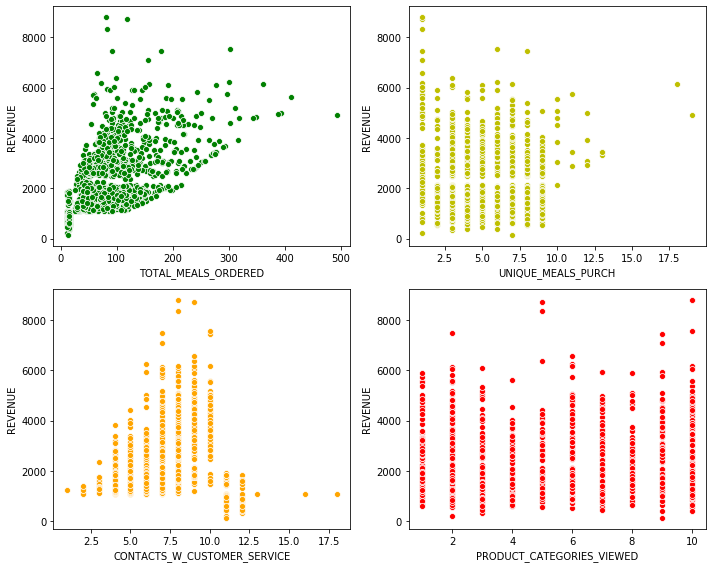

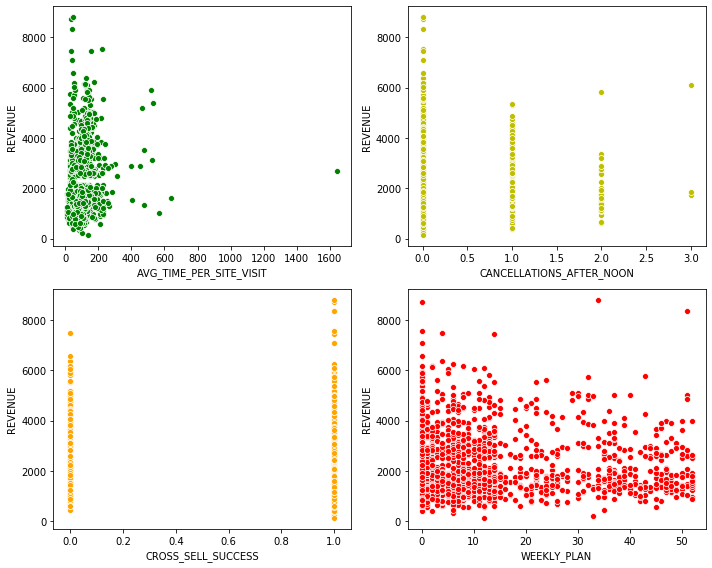

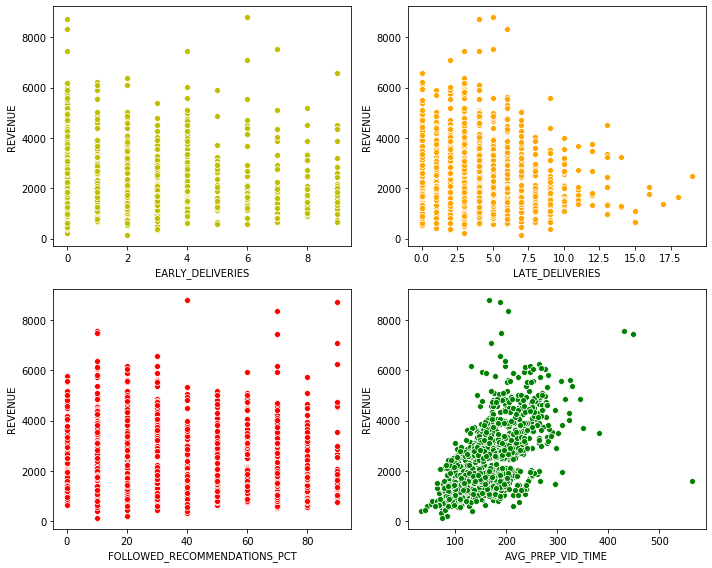

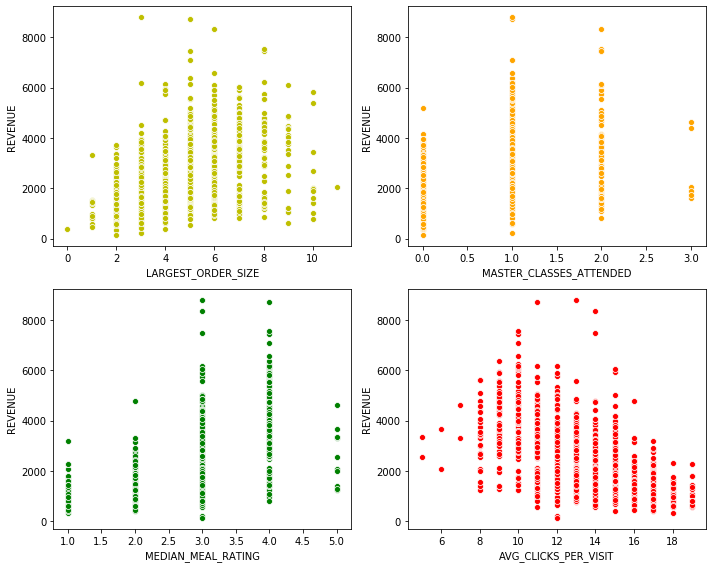

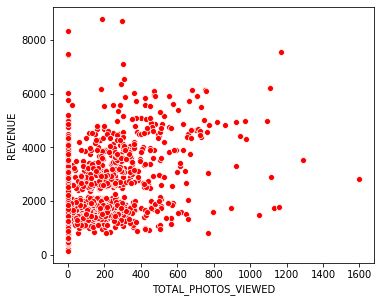

In [5]:
########################
# Visual EDA (Scatterplots)
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['TOTAL_MEALS_ORDERED'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['UNIQUE_MEALS_PURCH'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('UNIQUE_MEALS_PURCH')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['CONTACTS_W_CUSTOMER_SERVICE'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')

########################
plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['PRODUCT_CATEGORIES_VIEWED'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['AVG_TIME_PER_SITE_VISIT'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['CANCELLATIONS_AFTER_NOON'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('CANCELLATIONS_AFTER_NOON')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['CROSS_SELL_SUCCESS'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('CROSS_SELL_SUCCESS')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['WEEKLY_PLAN'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('WEEKLY_PLAN')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['EARLY_DELIVERIES'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('EARLY_DELIVERIES')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['LATE_DELIVERIES'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('LATE_DELIVERIES')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['FOLLOWED_RECOMMENDATIONS_PCT'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['AVG_PREP_VID_TIME'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('AVG_PREP_VID_TIME')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['LARGEST_ORDER_SIZE'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('LARGEST_ORDER_SIZE')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['MASTER_CLASSES_ATTENDED'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('MASTER_CLASSES_ATTENDED')

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['MEDIAN_MEAL_RATING'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('MEDIAN_MEAL_RATING')

plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['AVG_CLICKS_PER_VISIT'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('AVG_CLICKS_PER_VISIT')

plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['TOTAL_PHOTOS_VIEWED'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('TOTAL_PHOTOS_VIEWED')
plt.tight_layout()
plt.show()

<h1> Thresholds </h1><br> 

This is where the model takes it shape. First, I will create my thresholds found by the trend, then i will create new variable columns to see which is more important to the data. This will be found later when we model. 

In [6]:
#Trend Based Threshold

CONTACTS_W_CUSTOMER_SERVICE_CHANGE_HI = 10  #Data Drops off after this point
AVG_TIME_PER_SITE_VISIT_CHANGE_LO     = 100 #Data Drops off before this point
AVG_PREP_VID_TIME_CHANGE_HI           = 250 #Data Scatters after this point
LARGEST_ORDER_SIZE_CHANGE_HI          = 5   #Change in trend after this point
AVG_CLICKS_PER_VISIT_CHANGE_HI        = 10  #Change in trend after this point
MASTER_CLASSES_ATTENDED_CHANGE_LO     = 1   #Change in trend after this point
TOTAL_MEALS_ORDERED_CHANGE_LO         = 24  #Data Drops off before this point

############################################################################

CANCELLATIONS_BEFORE_NOON_CHANGE_AT   = 0   #Zero inflated
CANCELLATIONS_AFTER_NOON_CHANGE_AT    = 0   #Zero inflated
WEEKLY_PLAN_CHANGE_AT                 = 0   #Zero inflated
TOTAL_PHOTOS_VIEWED_CHANGE_AT         = 0   #Zero inflated
UNIQUE_MEALS_PURC_CHANGE_AT           = 1   #Only different at this point
MEDIAN_MEAL_RATING_CHANGE_AT          = 3   #Analysing point 3 seperately
MEDIAN_MEAL_RATING_CHANGE_AT_4        = 4   #Analysing point 4 seperately
MEDIAN_MEAL_RATING_CHANGE_AT_5        = 5   #Analysing point 5 seperately

In [7]:
# Contact With Customer Service 
original_df['change_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition = original_df.loc[0:,'change_CONTACTS_W_CUSTOMER_SERVICE'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_CHANGE_HI]

original_df['change_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition,
                                value      = 1,
                                inplace    = True)


# Average Time Spent Per Visit
original_df['change_AVG_TIME_PER_SITE_VISIT'] = 0

condition = original_df.loc[0:,'change_AVG_TIME_PER_SITE_VISIT'][original_df['AVG_TIME_PER_SITE_VISIT'] < AVG_TIME_PER_SITE_VISIT_CHANGE_LO]

original_df['change_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition,
                                      value      = 1,
                                      inplace    = True)
# Average Prep Vid
original_df['change_AVG_PREP_VID_TIME'] = 0
condition = original_df.loc[0:,'change_AVG_PREP_VID_TIME'][original_df['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_HI ]

original_df['change_AVG_PREP_VID_TIME'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)
# Unique Meals Purchased
original_df['change_LARGEST_ORDER_SIZE'] = 0
condition = original_df.loc[0:,'change_LARGEST_ORDER_SIZE'][original_df['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_CHANGE_HI ]

original_df['change_LARGEST_ORDER_SIZE'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# Average Clicks Per Visit
original_df['change_AVG_CLICKS_PER_VISIT'] = 0
condition = original_df.loc[0:,'change_AVG_CLICKS_PER_VISIT'][original_df['AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_CHANGE_HI ]

original_df['change_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)


# Master Classes Attended
original_df['change_MASTER_CLASSES_ATTENDED'] = 0
condition = original_df.loc[0:,'change_MASTER_CLASSES_ATTENDED'][original_df['MASTER_CLASSES_ATTENDED'] < MASTER_CLASSES_ATTENDED_CHANGE_LO ]

original_df['change_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# Total Meals Ordered
original_df['change_TOTAL_MEALS_ORDERED'] = 0
condition = original_df.loc[0:,'change_TOTAL_MEALS_ORDERED'][original_df['TOTAL_MEALS_ORDERED'] < TOTAL_MEALS_ORDERED_CHANGE_LO ]

original_df['change_TOTAL_MEALS_ORDERED'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

########################################
##      change at threshold           ##
########################################

# double-equals sign

# Unique Meals Purchased
original_df['change_UNIQUE_MEALS_PURCH'] = 0
condition = original_df.loc[0:,'change_UNIQUE_MEALS_PURCH'][original_df['UNIQUE_MEALS_PURCH'] == UNIQUE_MEALS_PURC_CHANGE_AT]

original_df['change_UNIQUE_MEALS_PURCH'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)


# Cancellations Before Noon
original_df['change_CANCELLATIONS_BEFORE_NOON'] = 0
condition = original_df.loc[0:,'change_CANCELLATIONS_BEFORE_NOON'][original_df['CANCELLATIONS_BEFORE_NOON'] == CANCELLATIONS_BEFORE_NOON_CHANGE_AT]

original_df['change_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition,
                                  value      = 1,
                                  inplace    = True)


# Cancellations After Noon
original_df['change_CANCELLATIONS_AFTER_NOON'] = 0
condition = original_df.loc[0:,'change_CANCELLATIONS_AFTER_NOON'][original_df['CANCELLATIONS_AFTER_NOON'] == CANCELLATIONS_AFTER_NOON_CHANGE_AT]

original_df['change_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition,
                                  value      = 1,
                                  inplace    = True)


# Weekly Plan
original_df['change_WEEKLY_PLAN'] = 0
condition = original_df.loc[0:,'change_WEEKLY_PLAN'][original_df['WEEKLY_PLAN'] == WEEKLY_PLAN_CHANGE_AT]

original_df['change_WEEKLY_PLAN'].replace(to_replace = condition,
                                  value      = 1,
                                  inplace    = True)


# Total Photos Viewed
original_df['change_TOTAL_PHOTOS_VIEWED'] = 0
condition = original_df.loc[0:,'change_TOTAL_PHOTOS_VIEWED'][original_df['TOTAL_PHOTOS_VIEWED'] == TOTAL_PHOTOS_VIEWED_CHANGE_AT]

original_df['change_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition,
                                      value      = 1,
                                      inplace    = True)

# Median Meal Rating
original_df['change_MEDIAN_MEAL_RATING'] = 0
condition = original_df.loc[0:,'change_MEDIAN_MEAL_RATING'][original_df['MEDIAN_MEAL_RATING'] == MEDIAN_MEAL_RATING_CHANGE_AT]

original_df['change_MEDIAN_MEAL_RATING'].replace(to_replace = condition,
                                      value      = 1,
                                      inplace    = True)

original_df['change_MEDIAN_MEAL_RATING_4'] = 0
condition = original_df.loc[0:,'change_MEDIAN_MEAL_RATING_4'][original_df['MEDIAN_MEAL_RATING'] == MEDIAN_MEAL_RATING_CHANGE_AT_4]

original_df['change_MEDIAN_MEAL_RATING_4'].replace(to_replace = condition,
                                      value      = 1,
                                      inplace    = True)
original_df['change_MEDIAN_MEAL_RATING_5'] = 0
condition = original_df.loc[0:,'change_MEDIAN_MEAL_RATING_5'][original_df['MEDIAN_MEAL_RATING'] == MEDIAN_MEAL_RATING_CHANGE_AT_5]

original_df['change_MEDIAN_MEAL_RATING_5'].replace(to_replace = condition,
                                      value      = 1,
                                      inplace    = True)


<h1>Correlations</h1><br> 
We have to find out which of our variables correlate most with our explanatory value:

This is not in absolute form but it will show which is more important to revenue our target variable and will be able to show us the deepest insights from our feature engineering.

In [8]:
# creating a (Pearson) correlation matrix
df_corr = original_df.corr().round(2)


# printing (Pearson) correlations with SalePrice
print(df_corr.loc['REVENUE'].sort_values(ascending = False))


REVENUE                               1.00
AVG_PREP_VID_TIME                     0.64
MEDIAN_MEAL_RATING                    0.61
TOTAL_MEALS_ORDERED                   0.60
change_MEDIAN_MEAL_RATING_4           0.59
TOTAL_PHOTOS_VIEWED                   0.47
MASTER_CLASSES_ATTENDED               0.45
LARGEST_ORDER_SIZE                    0.44
out_TOTAL_PHOTOS_VIEWED               0.38
change_LARGEST_ORDER_SIZE             0.36
out_TOTAL_MEALS_ORDERED               0.27
out_MASTER_CLASSES_ATTENDED           0.22
change_UNIQUE_MEALS_PURCH             0.21
AVG_TIME_PER_SITE_VISIT               0.14
out_UNIQUE_MEALS_PURCH                0.13
change_AVG_PREP_VID_TIME              0.12
out_AVG_PREP_VID_TIME                 0.12
CONTACTS_W_CUSTOMER_SERVICE           0.10
out_AVG_TIME_PER_SITE_VISIT           0.05
change_MEDIAN_MEAL_RATING_5           0.04
out_CANCELLATIONS_AFTER_NOON          0.04
out_MEDIAN_MEAL_RATING                0.04
change_CANCELLATIONS_AFTER_NOON       0.04
MOBILE_NUMB

<h1>Splitting Emails</h1><br>

It's important to split the emails so that we can leverage them in different groups.
This will allow us to trace our customers better and develop better insights.

In [9]:
# STEP 1: splitting personal emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in original_df.iterrows():
    
    # splitting email domain at '@'
    split_email = original_df.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    
# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)

In [10]:
#Setting Personal, Professional and Junk Emails
personal_email_domains      = ['@gmail.com',
                               '@yahoo.com',
                               '@protonmail.com']

professional_email_domains  = ['@mmm.com',
                               '@amex.com',
                               '@apple.com',
                               '@boeing.com',
                               '@caterpillar.com',
                               '@chevron.com',
                               '@cisco.com',
                               '@cocacola.com',
                               '@disney.com',
                               '@dupont.com',
                               '@exxon.com',
                               '@ge.org',
                               '@goldmansacs.com',
                               '@homedepot.com',
                               '@ibm.com',
                               '@intel.com',
                               '@jnj.com',
                               '@jpmorgan.com',
                               '@mcdonalds.com',
                               '@merck.com',
                               '@microsoft.com',
                               '@nike.com',
                               '@pfizer.com',
                               '@pg.com',
                               '@travelers.com',
                               '@unitedtech.com',
                               '@unitedhealth.com',
                               '@verizon.com',
                               '@visa.com',
                               '@walmart.com']

junk_email_domains       = ['@me.com',
                            '@aol.com',
                            '@hotmail.com',
                            '@live.com',
                            '@msn.com',
                            '@passport.com']


# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in email_df[1]:
        if '@' + domain in personal_email_domains:
            placeholder_lst.append('personal')
            
        elif '@' + domain in professional_email_domains:
            placeholder_lst.append('professional')
           
        elif '@' + domain in junk_email_domains:
            placeholder_lst.append('junk')
            
        else:
            print('Unknown')


# concatenating with original DataFrame
original_df['domain_group'] = pd.Series(placeholder_lst)

# checking results
original_df['domain_group'].value_counts()



personal        861
professional    696
junk            389
Name: domain_group, dtype: int64

<h2>One Hot Encoding</h2><br> 
One hot encoding is a procedure where you create binary tags for objects in a 
dataframe. Data will be split up and represented by zeros and ones to make the process of computation easier. 

In [11]:
#Creating dummies for Emails
one_hot_Email      = pd.get_dummies(original_df['domain_group'])
#Dropping EMAIL and domain_group from original_df
original_df        = original_df.drop('EMAIL', axis = 1)
original_df        = original_df.drop('domain_group', axis = 1)
#Joining the dummies to original_df
original_df        = original_df.join([one_hot_Email])

<h1>Beverages Purchased</h1><br>

It is hard to determine whether a customer ordered extra beverages from the original columns. 
I am going to create a new variable that allows us to understand if someone in the data orders beverages 
This is important as we are using CROSS_SELL_SUCCESS as the explanatory variable. 

Since all meals can only be priced between 10 dollars and 23 dollars The data points that have a split higher than $23
will now be understood as those who are apart of the CROSS SELL platform and ordered drinks.

In [12]:
# Creating new variables 
# 'beverage'
# Lets me know if buying beverages increaes revenue

original_df['avg_spend'] = original_df['REVENUE']/original_df['TOTAL_MEALS_ORDERED']

avg_spend_change_hi = 23 # ADHOC high meal set price at 23 

original_df['beverage'] = 0
condition = original_df.loc[0:,'beverage'][original_df['avg_spend'] > avg_spend_change_hi]

original_df['beverage'].replace(to_replace = condition,
                                      value      = 1,
                                      inplace    = True)


<h1>Modeling: Linear Regression</h1><br> 

We will use linear regression to model.
In our case: REVENUE

Any variable with a P-value over .5 will not be considered. 
One after one, I will eliminate variables until I have cut down the model enough. 
My goal is to not have any variables have a P-value > than 0.1.

The second model shows the cut down linear regression. 

In [13]:
# making a copy of original_df
original_df_explanatory = original_df.copy()

# dropping SalePrice and Order from the explanatory variable set
original_df_explanatory = original_df_explanatory.drop('REVENUE', axis = 1)

# formatting each explanatory variable for statsmodels
for val in original_df_explanatory:
    print(f"original_df['{val}'] +")

original_df['CROSS_SELL_SUCCESS'] +
original_df['NAME'] +
original_df['FIRST_NAME'] +
original_df['FAMILY_NAME'] +
original_df['TOTAL_MEALS_ORDERED'] +
original_df['UNIQUE_MEALS_PURCH'] +
original_df['CONTACTS_W_CUSTOMER_SERVICE'] +
original_df['PRODUCT_CATEGORIES_VIEWED'] +
original_df['AVG_TIME_PER_SITE_VISIT'] +
original_df['MOBILE_NUMBER'] +
original_df['CANCELLATIONS_BEFORE_NOON'] +
original_df['CANCELLATIONS_AFTER_NOON'] +
original_df['TASTES_AND_PREFERENCES'] +
original_df['MOBILE_LOGINS'] +
original_df['PC_LOGINS'] +
original_df['WEEKLY_PLAN'] +
original_df['EARLY_DELIVERIES'] +
original_df['LATE_DELIVERIES'] +
original_df['PACKAGE_LOCKER'] +
original_df['REFRIGERATED_LOCKER'] +
original_df['FOLLOWED_RECOMMENDATIONS_PCT'] +
original_df['AVG_PREP_VID_TIME'] +
original_df['LARGEST_ORDER_SIZE'] +
original_df['MASTER_CLASSES_ATTENDED'] +
original_df['MEDIAN_MEAL_RATING'] +
original_df['AVG_CLICKS_PER_VISIT'] +
original_df['TOTAL_PHOTOS_VIEWED'] +
original_df['out_TOTAL_MEALS_ORDERE

<h2>Modeling: Full Linear </h2><br> 


In [14]:
# building a full model

lm_full = smf.ols(formula = """original_df['REVENUE']~ original_df['CROSS_SELL_SUCCESS'] +
                            original_df['TOTAL_MEALS_ORDERED'] +
                            original_df['UNIQUE_MEALS_PURCH'] +
                            original_df['CONTACTS_W_CUSTOMER_SERVICE'] +
                            original_df['PRODUCT_CATEGORIES_VIEWED'] +
                            original_df['AVG_TIME_PER_SITE_VISIT'] +
                            original_df['MOBILE_NUMBER'] +
                            original_df['CANCELLATIONS_BEFORE_NOON'] +
                            original_df['CANCELLATIONS_AFTER_NOON'] +
                            original_df['TASTES_AND_PREFERENCES'] +
                            original_df['MOBILE_LOGINS'] +
                            original_df['PC_LOGINS'] +
                            original_df['WEEKLY_PLAN'] +
                            original_df['EARLY_DELIVERIES'] +
                            original_df['LATE_DELIVERIES'] +
                            original_df['PACKAGE_LOCKER'] +
                            original_df['REFRIGERATED_LOCKER'] +
                            original_df['FOLLOWED_RECOMMENDATIONS_PCT'] +
                            original_df['AVG_PREP_VID_TIME'] +
                            original_df['LARGEST_ORDER_SIZE'] +
                            original_df['MASTER_CLASSES_ATTENDED'] +
                            original_df['MEDIAN_MEAL_RATING'] +
                            original_df['AVG_CLICKS_PER_VISIT'] +
                            original_df['TOTAL_PHOTOS_VIEWED'] +
                            original_df['out_TOTAL_MEALS_ORDERED'] +
                            original_df['out_UNIQUE_MEALS_PURCH'] +
                            original_df['out_AVG_TIME_PER_SITE_VISIT'] +
                            original_df['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                            original_df['out_CANCELLATIONS_BEFORE_NOON'] +
                            original_df['out_CANCELLATIONS_AFTER_NOON'] +
                            original_df['out_MOBILE_LOGINS'] +
                            original_df['out_WEEKLY_PLAN'] +
                            original_df['out_EARLY_DELIVERIES'] +
                            original_df['out_LATE_DELIVERIES'] +
                            original_df['out_AVG_PREP_VID_TIME'] +
                            original_df['out_LARGEST_ORDER_SIZE'] +
                            original_df['out_MASTER_CLASSES_ATTENDED'] +
                            original_df['out_AVG_CLICKS_PER_VISIT'] +
                            original_df['out_MEDIAN_MEAL_RATING'] +
                            original_df['out_TOTAL_PHOTOS_VIEWED'] +
                            original_df['change_CONTACTS_W_CUSTOMER_SERVICE'] +
                            original_df['change_AVG_TIME_PER_SITE_VISIT'] +
                            original_df['change_AVG_PREP_VID_TIME'] +
                            original_df['change_LARGEST_ORDER_SIZE'] +
                            original_df['change_AVG_CLICKS_PER_VISIT'] +
                            original_df['change_MASTER_CLASSES_ATTENDED'] +
                            original_df['change_TOTAL_MEALS_ORDERED'] +
                            original_df['change_UNIQUE_MEALS_PURCH'] +
                            original_df['change_CANCELLATIONS_BEFORE_NOON'] +
                            original_df['change_CANCELLATIONS_AFTER_NOON'] +
                            original_df['change_WEEKLY_PLAN'] +
                            original_df['change_TOTAL_PHOTOS_VIEWED'] +
                            original_df['change_MEDIAN_MEAL_RATING'] +
                            original_df['change_MEDIAN_MEAL_RATING_4'] +
                            original_df['change_MEDIAN_MEAL_RATING_5'] +
                            original_df['junk'] +
                            original_df['personal'] +
                            original_df['professional'] +
                            original_df['beverage']""",
                            data = original_df)

# telling Python to run the data through the blueprint
results_full_1 = lm_full.fit()


# printing the results
results_full_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     original_df['REVENUE']   R-squared:                       0.816
Model:                                OLS   Adj. R-squared:                  0.810
Method:                     Least Squares   F-statistic:                     149.4
Date:                    Wed, 05 Feb 2020   Prob (F-statistic):               0.00
Time:                            17:38:04   Log-Likelihood:                -14809.
No. Observations:                    1946   AIC:                         2.973e+04
Df Residuals:                        1889   BIC:                         3.005e+04
Df Model:                              56                                         
Covariance Type:                nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                          -300.0878    284.561     -1.055      0.292    -858.174     257.998
original_df['CROSS_SELL_SUCCESS']                   -74.5228     29.303     -2.543      0.011    -131.993     -17.053
original_df['TOTAL_MEALS_ORDERED']                   10.6103      0.433     24.510      0.000       9.761      11.459
original_df['UNIQUE_MEALS_PURCH']                     0.4166      5.440      0.077      0.939     -10.252      11.085
original_df['CONTACTS_W_CUSTOMER_SERVICE']           90.8902      8.440     10.769      0.000      74.338     107.443
original_df['PRODUCT_CATEGORIES_VIEWED']              4.9995      3.765      1.328      0.184      -2.384      12.383
original_df['AVG_TIME_PER_SITE_VISIT']                0.8994      0.292      3.080      0.002       0.327       1.472
original_df['MOBILE_NUMBER']                         22.1759     35.108      0.632      0.528     -46.679      91.031
original_df['CANCELLATIONS_BEFORE_NOON']              1.6351     10.117      0.162      0.872     -18.207      21.477
original_df['CANCELLATIONS_AFTER_NOON']             -85.2867     88.099     -0.968      0.333    -258.068      87.494
original_df['TASTES_AND_PREFERENCES']                -5.5106     25.319     -0.218      0.828     -55.166      44.145
original_df['MOBILE_LOGINS']                         10.3764     19.631      0.529      0.597     -28.124      48.877
original_df['PC_LOGINS']                            -14.8383     21.700     -0.684      0.494     -57.396      27.719
original_df['WEEKLY_PLAN']                           -0.4770      1.031     -0.463      0.644      -2.499       1.545
original_df['EARLY_DELIVERIES']                       2.2573      6.223      0.363      0.717      -9.948      14.463
original_df['LATE_DELIVERIES']                        6.3942      4.790      1.335      0.182      -3.001      15.789
original_df['PACKAGE_LOCKER']                        12.0345     27.292      0.441      0.659     -41.492      65.561
original_df['REFRIGERATED_LOCKER']                  -56.1074     41.077     -1.366      0.172    -136.668      24.453
original_df['FOLLOWED_RECOMMENDATIONS_PCT']           0.7654      0.486      1.575      0.115      -0.187       1.718
original_df['AVG_PREP_VID_TIME']                      7.0319      0.505     13.936      0.000       6.042       8.021
original_df['LARGEST_ORDER_SIZE']                   -80.4844     15.260     -5.274      0.000    -110.412     -50.557
original_df['MASTER_CLASSES_ATTENDED']             -549.5798    212.425     -2.587      0.010    -966.191    -132.968
original_df['MEDIAN_MEAL_RATING']                    66.1564     60.986      1.085      0

<h2>Significant Model</h2><br> 

The second model shows the linear regression freed from high P-value variables. It only includes variables with a P-value below 0.1.

In [15]:
# building a fit model

# blueprinting a model type
lm_fit = smf.ols(formula = """original_df['REVENUE']~ original_df['CROSS_SELL_SUCCESS'] +
                            original_df['TOTAL_MEALS_ORDERED'] +
                            original_df['CONTACTS_W_CUSTOMER_SERVICE'] +
                            original_df['PRODUCT_CATEGORIES_VIEWED'] +
                            original_df['AVG_TIME_PER_SITE_VISIT'] +
                            original_df['LATE_DELIVERIES'] +
                            original_df['FOLLOWED_RECOMMENDATIONS_PCT'] +
                            original_df['AVG_PREP_VID_TIME'] +
                            original_df['LARGEST_ORDER_SIZE'] +
                            original_df['MASTER_CLASSES_ATTENDED'] +
                            original_df['TOTAL_PHOTOS_VIEWED'] +
                            original_df['out_TOTAL_MEALS_ORDERED'] +
                            original_df['out_UNIQUE_MEALS_PURCH'] +
                            original_df['out_AVG_TIME_PER_SITE_VISIT'] +
                            original_df['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                            original_df['out_CANCELLATIONS_AFTER_NOON'] +
                            original_df['out_WEEKLY_PLAN'] +
                            original_df['out_AVG_PREP_VID_TIME'] +
                            original_df['out_LARGEST_ORDER_SIZE'] +
                            original_df['out_MASTER_CLASSES_ATTENDED'] +
                            original_df['change_CONTACTS_W_CUSTOMER_SERVICE'] +
                            original_df['change_AVG_PREP_VID_TIME'] +
                            original_df['change_LARGEST_ORDER_SIZE'] +
                            original_df['change_MASTER_CLASSES_ATTENDED'] +
                            original_df['change_TOTAL_MEALS_ORDERED'] +
                            original_df['change_UNIQUE_MEALS_PURCH'] +
                            original_df['change_MEDIAN_MEAL_RATING'] +
                            original_df['change_MEDIAN_MEAL_RATING_4'] +
                            original_df['junk'] +
                            original_df['personal'] +
                            original_df['professional'] +
                            original_df['beverage']""",
                            data = original_df)



# telling Python to run the data through the blueprint
results_fit = lm_fit.fit()


# printing the results
results_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     original_df['REVENUE']   R-squared:                       0.814
Model:                                OLS   Adj. R-squared:                  0.812
Method:                     Least Squares   F-statistic:                     280.2
Date:                    Wed, 05 Feb 2020   Prob (F-statistic):               0.00
Time:                            17:38:04   Log-Likelihood:                -14816.
No. Observations:                    1946   AIC:                         2.969e+04
Df Residuals:                        1915   BIC:                         2.987e+04
Df Model:                              30                                         
Covariance Type:                nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                          -241.6272    171.210     -1.411      0.158    -577.406      94.151
original_df['CROSS_SELL_SUCCESS']                   -70.5720     28.327     -2.491      0.013    -126.127     -15.017
original_df['TOTAL_MEALS_ORDERED']                   10.6311      0.425     24.987      0.000       9.797      11.466
original_df['CONTACTS_W_CUSTOMER_SERVICE']           91.9559      8.361     10.998      0.000      75.558     108.353
original_df['PRODUCT_CATEGORIES_VIEWED']              5.0695      3.724      1.361      0.174      -2.234      12.373
original_df['AVG_TIME_PER_SITE_VISIT']                0.8400      0.244      3.436      0.001       0.361       1.319
original_df['LATE_DELIVERIES']                        8.3380      4.103      2.032      0.042       0.291      16.385
original_df['FOLLOWED_RECOMMENDATIONS_PCT']           0.6762      0.481      1.407      0.160      -0.266       1.619
original_df['AVG_PREP_VID_TIME']                      7.0030      0.493     14.193      0.000       6.035       7.971
original_df['LARGEST_ORDER_SIZE']                   -80.7012     15.049     -5.363      0.000    -110.215     -51.187
original_df['MASTER_CLASSES_ATTENDED']             -545.5719    210.893     -2.587      0.010    -959.176    -131.968
original_df['TOTAL_PHOTOS_VIEWED']                    0.3381      0.073      4.634      0.000       0.195       0.481
original_df['out_TOTAL_MEALS_ORDERED']             -640.3956    120.184     -5.328      0.000    -876.101    -404.690
original_df['out_UNIQUE_MEALS_PURCH']              -303.5398    166.424     -1.824      0.068    -629.931      22.852
original_df['out_AVG_TIME_PER_SITE_VISIT']         -404.5502    142.907     -2.831      0.005    -684.820    -124.281
original_df['out_CONTACTS_W_CUSTOMER_SERVICE']      204.3422    148.154      1.379      0.168     -86.218     494.902
original_df['out_CANCELLATIONS_AFTER_NOON']         265.2827    288.309      0.920      0.358    -300.149     830.715
original_df['out_WEEKLY_PLAN']                      203.9394     94.563      2.157      0.031      18.482     389.397
original_df['out_AVG_PREP_VID_TIME']               -193.5673    137.623     -1.407      0.160    -463.474      76.340
original_df['out_LARGEST_ORDER_SIZE']             -1112.5103    501.640     -2.218      0.027   -2096.328    -128.693
original_df['out_MASTER_CLASSES_ATTENDED']          711.7469    221.961      3.207      0.001     276.436    1147.057
original_df['change_CONTACTS_W_CUSTOMER_SERVICE'] -1391.8173    368.562     -3.776      0.000   -2114.641    -668.993
original_df['change_AVG_PREP_VID_TIME']            -193.5673    137.623     -1.407      0

<h1>Train Test Split</h1><br> 

I am now ready to split my data into its proper segments and begin running different
model types and being receiving scores.

In [16]:
# preparing explanatory variable data
original_df_data   = original_df.drop('REVENUE', axis = 1)


# preparing response variable data
original_df_target = original_df.loc[:, 'REVENUE']


# preparing training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
            original_df_data,
            original_df_target,
            test_size = 0.25,
            random_state = 222)


# Training set 
print(X_train.shape)
print(y_train.shape)

# Testing set
print(X_test.shape)
print(y_test.shape)

(1459, 63)
(1459,)
(487, 63)
(487,)


<h2>Creating variable List & splitting</h2><br> 

In [17]:
# declaring set of x variables
x_variables = ['CROSS_SELL_SUCCESS','TOTAL_MEALS_ORDERED',
               'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
               'AVG_TIME_PER_SITE_VISIT', 'LATE_DELIVERIES','REFRIGERATED_LOCKER',
               'FOLLOWED_RECOMMENDATIONS_PCT','AVG_PREP_VID_TIME','LARGEST_ORDER_SIZE',
               'MASTER_CLASSES_ATTENDED','TOTAL_PHOTOS_VIEWED','out_TOTAL_MEALS_ORDERED',
               'out_UNIQUE_MEALS_PURCH','out_AVG_TIME_PER_SITE_VISIT',
               'out_CONTACTS_W_CUSTOMER_SERVICE','out_CANCELLATIONS_AFTER_NOON',
               'out_WEEKLY_PLAN','out_AVG_PREP_VID_TIME','out_LARGEST_ORDER_SIZE',
               'out_MASTER_CLASSES_ATTENDED','change_CONTACTS_W_CUSTOMER_SERVICE',
               'change_AVG_PREP_VID_TIME','change_MASTER_CLASSES_ATTENDED',
               'change_TOTAL_MEALS_ORDERED','change_UNIQUE_MEALS_PURCH',
               'change_LARGEST_ORDER_SIZE','change_MEDIAN_MEAL_RATING',
               'change_MEDIAN_MEAL_RATING_4', 'change_LARGEST_ORDER_SIZE',
               'beverage', 'personal', 'junk', 'professional'] 

# looping to make x variables suitable for statsmodels
for val in x_variables:
    print(f"original_train['{val}'] +")

original_train['CROSS_SELL_SUCCESS'] +
original_train['TOTAL_MEALS_ORDERED'] +
original_train['CONTACTS_W_CUSTOMER_SERVICE'] +
original_train['PRODUCT_CATEGORIES_VIEWED'] +
original_train['AVG_TIME_PER_SITE_VISIT'] +
original_train['LATE_DELIVERIES'] +
original_train['REFRIGERATED_LOCKER'] +
original_train['FOLLOWED_RECOMMENDATIONS_PCT'] +
original_train['AVG_PREP_VID_TIME'] +
original_train['LARGEST_ORDER_SIZE'] +
original_train['MASTER_CLASSES_ATTENDED'] +
original_train['TOTAL_PHOTOS_VIEWED'] +
original_train['out_TOTAL_MEALS_ORDERED'] +
original_train['out_UNIQUE_MEALS_PURCH'] +
original_train['out_AVG_TIME_PER_SITE_VISIT'] +
original_train['out_CONTACTS_W_CUSTOMER_SERVICE'] +
original_train['out_CANCELLATIONS_AFTER_NOON'] +
original_train['out_WEEKLY_PLAN'] +
original_train['out_AVG_PREP_VID_TIME'] +
original_train['out_LARGEST_ORDER_SIZE'] +
original_train['out_MASTER_CLASSES_ATTENDED'] +
original_train['change_CONTACTS_W_CUSTOMER_SERVICE'] +
original_train['change_AVG_PREP_VID_T

<h1> Logging Revenue </h1><br> 

After some research, I want to log my revenue as in the plots there is some skewness in the revenue variable and this will remove it along with creating a more traditional trajectory of the variable. This will give my model a more accurate score.

In [19]:
# Creating a log for revenue to run my models 

original_df['log_revenue'] = np.log(original_df["REVENUE"])


<h1> Final Model </h1><br> 

Model that has significant variables and logged revenue

In [20]:
#Running a model with log revenue to check ols 
lm_full_log = smf.ols(formula = """original_df['log_revenue']~ original_df['CROSS_SELL_SUCCESS'] +
                            original_df['TOTAL_MEALS_ORDERED'] +
                            original_df['CONTACTS_W_CUSTOMER_SERVICE'] +
                            original_df['PRODUCT_CATEGORIES_VIEWED'] +
                            original_df['AVG_TIME_PER_SITE_VISIT'] +
                            original_df['LATE_DELIVERIES'] +
                            original_df['FOLLOWED_RECOMMENDATIONS_PCT'] +
                            original_df['AVG_PREP_VID_TIME'] +
                            original_df['LARGEST_ORDER_SIZE'] +
                            original_df['MASTER_CLASSES_ATTENDED'] +
                            original_df['TOTAL_PHOTOS_VIEWED'] +
                            original_df['out_TOTAL_MEALS_ORDERED'] +
                            original_df['out_UNIQUE_MEALS_PURCH'] +
                            original_df['out_AVG_TIME_PER_SITE_VISIT'] +
                            original_df['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                            original_df['out_CANCELLATIONS_AFTER_NOON'] +
                            original_df['out_WEEKLY_PLAN'] +
                            original_df['out_AVG_PREP_VID_TIME'] +
                            original_df['out_LARGEST_ORDER_SIZE'] +
                            original_df['out_MASTER_CLASSES_ATTENDED'] +
                            original_df['change_CONTACTS_W_CUSTOMER_SERVICE'] +
                            original_df['change_AVG_PREP_VID_TIME'] +
                            original_df['change_LARGEST_ORDER_SIZE'] +
                            original_df['change_MASTER_CLASSES_ATTENDED'] +
                            original_df['change_TOTAL_MEALS_ORDERED'] +
                            original_df['change_UNIQUE_MEALS_PURCH'] +
                            original_df['change_MEDIAN_MEAL_RATING'] +
                            original_df['change_MEDIAN_MEAL_RATING_4'] +
                            original_df['junk'] +
                            original_df['personal'] +
                            original_df['professional'] +
                            original_df['beverage']""",
                            data = original_df)

# telling Python to run the data through the blueprint
results_full_3 = lm_full_log.fit()


# printing the results
results_full_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     original_df['log_revenue']   R-squared:                       0.855
Model:                                    OLS   Adj. R-squared:                  0.852
Method:                         Least Squares   F-statistic:                     375.5
Date:                        Wed, 05 Feb 2020   Prob (F-statistic):               0.00
Time:                                17:38:05   Log-Likelihood:                 513.51
No. Observations:                        1946   AIC:                            -965.0
Df Residuals:                            1915   BIC:                            -792.2
Df Model:                                  30                                         
Covariance Type:                    nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             4.8315      0.065     74.429      0.000       4.704       4.959
original_df['CROSS_SELL_SUCCESS']                    -0.0234      0.011     -2.179      0.029      -0.044      -0.002
original_df['TOTAL_MEALS_ORDERED']                    0.0042      0.000     26.069      0.000       0.004       0.005
original_df['CONTACTS_W_CUSTOMER_SERVICE']            0.0405      0.003     12.777      0.000       0.034       0.047
original_df['PRODUCT_CATEGORIES_VIEWED']              0.0023      0.001      1.618      0.106      -0.000       0.005
original_df['AVG_TIME_PER_SITE_VISIT']                0.0004   9.27e-05      4.371      0.000       0.000       0.001
original_df['LATE_DELIVERIES']                        0.0012      0.002      0.760      0.447      -0.002       0.004
original_df['FOLLOWED_RECOMMENDATIONS_PCT']           0.0002      0.000      1.269      0.205      -0.000       0.001
original_df['AVG_PREP_VID_TIME']                      0.0030      0.000     15.782      0.000       0.003       0.003
original_df['LARGEST_ORDER_SIZE']                    -0.0228      0.006     -3.989      0.000      -0.034      -0.012
original_df['MASTER_CLASSES_ATTENDED']               -0.1637      0.080     -2.047      0.041      -0.320      -0.007
original_df['TOTAL_PHOTOS_VIEWED']                 7.872e-05   2.77e-05      2.846      0.004    2.45e-05       0.000
original_df['out_TOTAL_MEALS_ORDERED']               -0.3390      0.046     -7.439      0.000      -0.428      -0.250
original_df['out_UNIQUE_MEALS_PURCH']                -0.0773      0.063     -1.226      0.220      -0.201       0.046
original_df['out_AVG_TIME_PER_SITE_VISIT']           -0.1574      0.054     -2.906      0.004      -0.264      -0.051
original_df['out_CONTACTS_W_CUSTOMER_SERVICE']        0.0621      0.056      1.106      0.269      -0.048       0.172
original_df['out_CANCELLATIONS_AFTER_NOON']           0.0678      0.109      0.620      0.535      -0.147       0.282
original_df['out_WEEKLY_PLAN']                        0.0679      0.036      1.892      0.059      -0.002       0.138
original_df['out_AVG_PREP_VID_TIME']                 -0.2805      0.052     -5.375      0.000      -0.383      -0.178
original_df['out_LARGEST_ORDER_SIZE']                -0.4191      0.190     -2.204      0.028      -0.792      -0.046
original_df['out_MASTER_CLASSES_ATTENDED']            0.2062      0.084      2.450      0.014       0.041       0.371
original_df['change_CONTACTS_W_CUSTOMER_SERVICE']    -0.7192      0.140     -5.147      0.000      -0.993      -0.445
original_df['change_AVG_PREP_VID_TIME']      

<h1> Scoring: </h1><br> 
    
I decided to score on five different types of models:
    
1. OLS - Linear Regression    
2. Ridge - Ridge Regression 
3. Lasso - Lasso Regression           
4. EN - ElasticNet
5. BR - BayesianRidge

<h2> Train Test split with Logged Revenue </h2><br> 

Sense I changed the Revenue variable i have to split the data again. It makes no difference in the modeling numbers

In [21]:
# applying model in scikit-learn

# Preparing a DataFrame based the the analysis above
original_df_data = original_df.loc[ : , x_variables]


# Preparing the target variable
original_df_target = original_df.loc[:, 'log_revenue']

# running train/test split again
X_train, X_test, y_train, y_test = train_test_split(
            original_df_data,
            original_df_target,
            test_size = 0.25,
            random_state = 222)

<h2> Scoring: </h2><br> 
1. OLS - Linear Regression 

In [22]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(X_train, y_train)


# PREDICTING on new data
lr_pred = lr_fit.predict(X_test)


# SCORING the results
print('Training Score:', lr.score(X_train, y_train).round(3))
print('Testing Score:',  lr.score(X_test, y_test).round(3))


# saving scoring data for future use
lr_train_score = lr.score(X_train, y_train).round(3)
lr_test_score  = lr.score(X_test, y_test).round(3)

Training Score: 0.862
Testing Score: 0.831


<h2> Scoring: </h2><br> 
1. Ridge - Ridge Regression 

In [23]:
# INSTANTIATING a model object
ridge_model = Ridge(alpha=0.05)


# FITTING the training data
ridge_fit = ridge_model.fit(X_train, y_train)


# PREDICTING on new data
ridge_pred = ridge_model.predict(X_test)

# SCORING the results
print('Training Score:', ridge_model.score(X_train, y_train).round(3))
print('Testing Score:',  ridge_model.score(X_test, y_test).round(3))


# saving scoring data for future use
ridge_train_score = ridge_model.score(X_train, y_train).round(3)
ridge_test_score  = ridge_model.score(X_test, y_test).round(3)

Training Score: 0.862
Testing Score: 0.831


<h2> Scoring: </h2><br> 
1. Lasso - Lassso Regression

In [24]:
# INSTANTIATING a model object
lasso_model = Lasso(alpha=0.001)

# FITTING the training data
lasso_fit = lasso_model.fit(X_train, y_train)


# PREDICTING on new data
lasso_pred = lasso_model.predict(X_test)

# SCORING the results
print('Training Score:', lasso_model.score(X_train, y_train).round(3))
print('Testing Score:',  lasso_model.score(X_test, y_test).round(3))


# saving scoring data for future use
lasso_train_score = lasso_model.score(X_train, y_train).round(3)
lasso_test_score  = lasso_model.score(X_test, y_test).round(3)

Training Score: 0.858
Testing Score: 0.828


<h2> Scoring: </h2><br> 
1. EN - ElasticNet

In [25]:
# Running a ElasticNet for my selected variables
en_model = ElasticNet(alpha = 0.001)

# FITTING the training data
en_fit  = en_model.fit(X_train, y_train)

# PREDICTING on new data
en_pred = en_fit.predict(X_test)

# SCORING the results
print('Training Score:', en_model.score(X_train, y_train).round(3))
print('Testing Score:',  en_model.score(X_test, y_test).round(3))

# saving scoring data for future use
en_train_score = en_model.score(X_train, y_train).round(3)
en_test_score  = en_model.score(X_test, y_test).round(3)

Training Score: 0.86
Testing Score: 0.83


<h2> Scoring: </h2><br> 
1. BR - Bayesian Ridge

In [26]:
# Running a BayesianRidge for my selected variables
bay_model=BayesianRidge()

# FITTING the training data
bay_fit  = bay_model.fit(X_train, y_train)

# PREDICTING on new data
bay_pred = bay_fit.predict(X_test)

# SCORING the results
print('Training Score:', bay_model.score(X_train, y_train).round(3))
print('Testing Score:',  bay_model.score(X_test, y_test).round(3))


# saving scoring data for future use
bay_train_score = bay_model.score(X_train, y_train).round(3)
bay_test_score  = bay_model.score(X_test, y_test).round(3)

Training Score: 0.862
Testing Score: 0.831


<br><h1 style="font-size:300%;"> Final Scores</h1>

In [28]:
# comparing results

print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}            {lr_test_score}
Ridge      {ridge_train_score}            {ridge_test_score}
Lasso      {lasso_train_score}            {lasso_test_score}
EN         {en_train_score}             {en_test_score}
BAY        {bay_train_score}            {bay_test_score}
""")




Model      Train Score      Test Score
-----      -----------      ----------
OLS        0.862            0.831
Ridge      0.862            0.831
Lasso      0.858            0.828
BAY        0.862            0.831
EN         0.86             0.83
GBR        0.914            0.846



<h1> Source </h1><br>
Hult International Business School